# 1.INTRODUCTION

NAMA : Dery Rai 

RMT :34

Notebook ini bertujuan untuk menganalisa dan prediksi pergantian karyawan yang bertujuan untuk memahami faktor-faktor yang berkontribusi terhadap pergantian dan mengembangkan model prediktif untuk mengidentifikasi karyawan yang berisiko. Dataset ini memberikan pandangan yang komprehensif dan realistis tentang faktor-faktor yang memengaruhi retensi karyawan, menjadikannya sumber daya yang berguna untuk pengembangan organisasi ataupun perusahaan.

# 2. Library

In [4]:
import pandas as pd
import numpy as np

# For visualize
import matplotlib.pyplot as plt
import seaborn as sns

# For Modeling
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score,classification_report,  classification_report, f1_score, recall_score , roc_auc_score
from sklearn.preprocessing import LabelEncoder ,  StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV , RandomizedSearchCV , cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer


# Menyimpan model terbaik ke dalam file
import pickle

# 3. Data loading

In [5]:
df_ori=pd.read_csv('train.csv')
df =df_ori.copy()
'source : https://www.kaggle.com/datasets/stealthtechnologies/employee-attrition-dataset?select=train.csv'

'source : https://www.kaggle.com/datasets/stealthtechnologies/employee-attrition-dataset?select=train.csv'

dataset  yang di dapat dari kaggle disimpan ke dalam df

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59598 entries, 0 to 59597
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Employee ID               59598 non-null  int64 
 1   Age                       59598 non-null  int64 
 2   Gender                    59598 non-null  object
 3   Years at Company          59598 non-null  int64 
 4   Job Role                  59598 non-null  object
 5   Monthly Income            59598 non-null  int64 
 6   Work-Life Balance         59598 non-null  object
 7   Job Satisfaction          59598 non-null  object
 8   Performance Rating        59598 non-null  object
 9   Number of Promotions      59598 non-null  int64 
 10  Overtime                  59598 non-null  object
 11  Distance from Home        59598 non-null  int64 
 12  Education Level           59598 non-null  object
 13  Marital Status            59598 non-null  object
 14  Number of Dependents  

terdapat 59598 dataset dari 24 kolom dan data sudah bersih dari missing value

In [7]:
df

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2,...,0,Mid,Medium,89,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4,Media,5534,Poor,High,Low,3,...,3,Mid,Medium,21,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0,...,3,Mid,Medium,74,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,3989,Good,High,High,1,...,2,Mid,Small,50,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0,...,0,Senior,Medium,68,No,No,No,Fair,Medium,Stayed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59593,37195,50,Female,12,Education,4414,Fair,High,Average,1,...,2,Senior,Small,35,No,No,Yes,Poor,Very High,Left
59594,6266,18,Male,4,Healthcare,8040,Fair,High,High,3,...,0,Senior,Medium,73,No,No,No,Fair,Medium,Left
59595,54887,22,Female,14,Technology,7944,Fair,High,High,0,...,2,Entry,Small,29,No,Yes,No,Good,Medium,Stayed
59596,861,23,Male,8,Education,2931,Fair,Very High,Average,0,...,0,Entry,Large,9,No,No,No,Good,Low,Left


# 4. EDA

<Axes: xlabel='Attrition'>

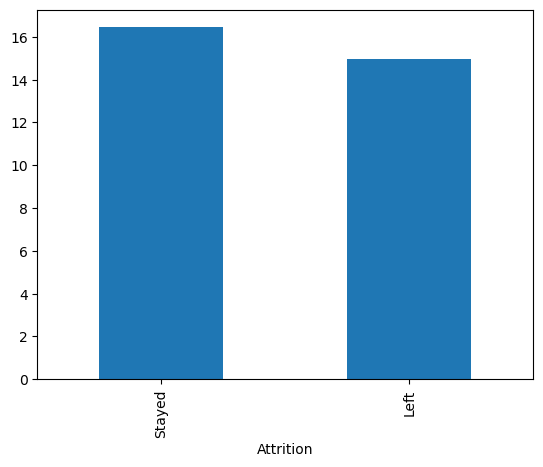

In [8]:
df.groupby(['Attrition'])['Years at Company'].mean().sort_values(ascending=False).plot(kind='bar') #visualisasi dengan plot bar

berdasakaran visualisasi yang ditampilkan lamanya karyawan bekerja pada perusahaan tidak begitu berpengaruh pada tinggal atau stay nya seorang karyawan pada sebuah perusahaan

In [9]:
df['Job Role'].unique()

array(['Education', 'Media', 'Healthcare', 'Technology', 'Finance'],
      dtype=object)

perusahaan ini membagi menjadi 5 jenis golongan pekerja antara lain di bagian education, media ,healthcare,technology, dan finance

In [10]:
# Filter Job Role berdasarkan lamanya kerja dalam lebih dari 10 tahun
loyalitas = df[df['Years at Company'] >= 10]
loyalitas_job = loyalitas.groupby('Job Role').size().sort_values(ascending=False).head(5)



In [11]:
loyalitas_job

Job Role
Technology    9899
Healthcare    8719
Education     8003
Media         6131
Finance       5365
dtype: int64

dilihat dari loyalitasnya sebuah karyawan berdasarkan lama kerjanya yang lebih dari 10 tahun job role technology memiliki karyawan yang lama kerjanya yang paling banyak

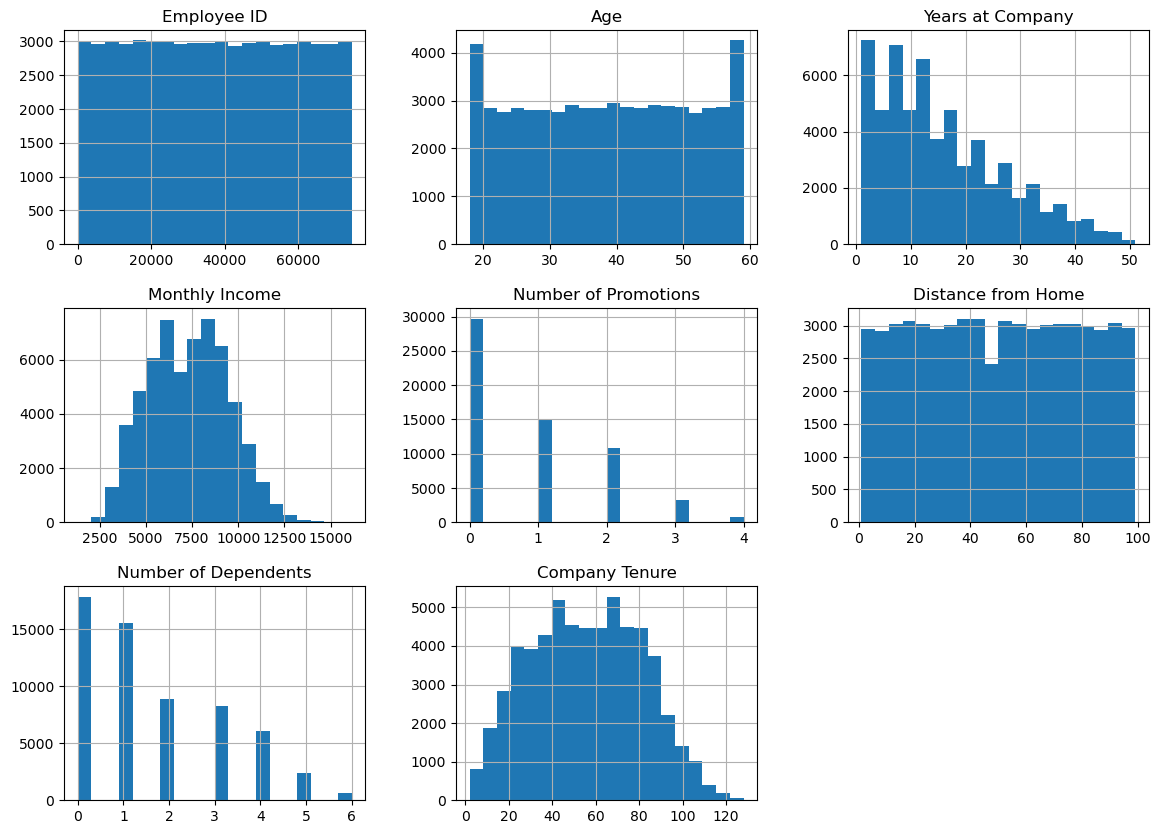

In [12]:
df.hist(bins=20, figsize=(14,10))
plt.show()


distribusi data tiap kolom yang terbaca numerik

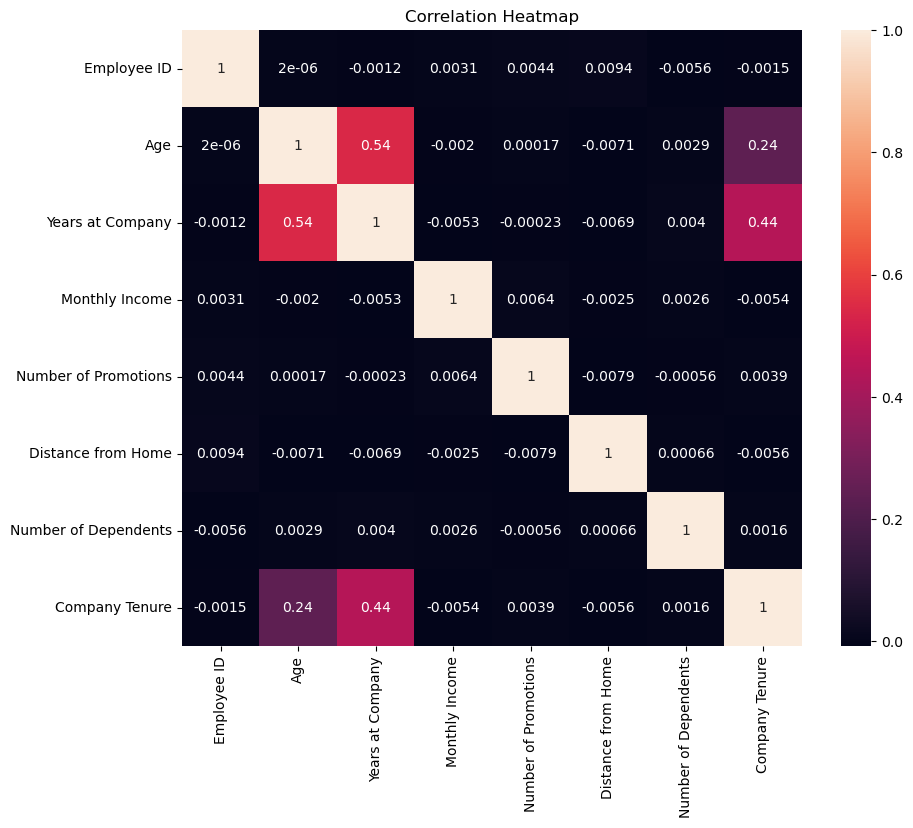

In [13]:
fig, ax = plt.subplots(figsize=(10, 8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, ax=ax)
plt.title("Correlation Heatmap");

korelasi antar kolom yang akan digunakan saat pemilihan fitur,hanya kolom Employee ID saja yang akan di drop nantinya

In [14]:
# Buat mapping manual
attrition_mapping = {'Stayed': 0, 'Left': 1}

# Terapkan mapping
df['Attrition'] = df['Attrition'].map(attrition_mapping)

# 5. Feature Engineering

## 5.1 Split x dan y

In [15]:
y= df["Attrition"]

# kolom fitur selain kolom target
X = df.drop(columns=["Attrition","Employee ID"], axis=1)

In [16]:
print("fitur:", X.shape) # pengecekan baris dan kolom di fitur dan target
print("target:",y.shape)

fitur: (59598, 22)
target: (59598,)


Hasil split fitur dan target dengan penggunaan 59598 data dari 22 kolom untuk fitur dan target 59598 dari 1 kolom

## 5.2 Train x dan y

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=20)
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size = 0.2, random_state=20)

In [18]:
print('Train Size : ', X_train.shape)
print('Test Size : ', X_test.shape)

Train Size :  (38142, 22)
Test Size :  (11920, 22)


total data train 38142 dan data tet 11920

## 5.3 Outlier

In [19]:
#pengecekan skewness pada tiap tiap colom
print('Distribution of column `Age` : ', X_train['Age'].skew())
print('Distribution of column `Years at Company`  : ', X_train['Years at Company'].skew())
print('Distribution of column `Monthly Income` : ', X_train['Monthly Income'].skew())
print('Distribution of column `Distance from Home`  : ', X_train['Distance from Home'].skew())
print('Distribution of column `Company Tenure` : ', X_train['Company Tenure'].skew())
print('Distribution of column `Number of Promotions`  : ', X_train['Number of Promotions'].skew())
print('Distribution of column `Number of Dependents` : ', X_train['Number of Dependents'].skew())


Distribution of column `Age` :  -0.005522438660548861
Distribution of column `Years at Company`  :  0.7930867884380575
Distribution of column `Monthly Income` :  0.1224961492426668
Distribution of column `Distance from Home`  :  0.001578080999447044
Distribution of column `Company Tenure` :  0.06399669346329225
Distribution of column `Number of Promotions`  :  0.9934318518867006
Distribution of column `Number of Dependents` :  0.7131786449831536


Persebaran data yang didapat cukup skew tidak ada yang menunjukan skewness yang extreme oleh karna itu data tidak akan dihandling outliernya jikapun ada outlier itu data alami yang emang pada dasarnya bukan sebuah keanehan

## 5.4 Split category dan numeric column

In [20]:
# cek kolom numerik dan kategorik
num_col = X_train.select_dtypes(include=np.number).columns.tolist()
cat_col = X_train.select_dtypes(include=['object']).columns.tolist()

print(f" kolom numerik :{num_col}")
print(f"kolom kategori : {cat_col}")

 kolom numerik :['Age', 'Years at Company', 'Monthly Income', 'Number of Promotions', 'Distance from Home', 'Number of Dependents', 'Company Tenure']
kolom kategori : ['Gender', 'Job Role', 'Work-Life Balance', 'Job Satisfaction', 'Performance Rating', 'Overtime', 'Education Level', 'Marital Status', 'Job Level', 'Company Size', 'Remote Work', 'Leadership Opportunities', 'Innovation Opportunities', 'Company Reputation', 'Employee Recognition']


In [21]:
# Kategori Ordinal
category_ordinal = [
    'Work-Life Balance',
    'Job Satisfaction',
    'Performance Rating',
    'Education Level',
    'Job Level'
]

# Kategori Numerik
category_numeric = [
    'Company Size',
    'Employee Recognition',
    'Innovation Opportunities',
    'Leadership Opportunities'
]

# Kategori Kategorikal (Tidak Ordinal)
category_categorical = [
    'Gender',
    'Job Role',
    'Overtime',
    'Marital Status',
    'Remote Work',
    'Company Reputation'
]


In [22]:
cat_col_o = category_ordinal
cat_col_n = category_numeric
cat_col = category_categorical

membagi kolom numerik dan kategori

# 5.5 Processing

In [23]:
# Daftar urutan level untuk encoding
work_life_balance_order = ['Poor', 'Good', 'Fair', 'Excellent']
job_satisfaction_order = ['Low', 'Medium', 'High', 'Very High']
performance_rating_order = ['Low', 'Below Average', 'Average', 'High']
education_level_order = ['High School', 'Associate Degree', 'Bachelor’s Degree', 'Master’s Degree', 'PhD']
job_level_order = ['Entry', 'Mid', 'Senior']

pengurutan level encoding ordinal

In [24]:
# Dictionary urutan level
ordinal_mapping = {
    'Work-Life Balance': work_life_balance_order,
    'Job Satisfaction': job_satisfaction_order,
    'Performance Rating': performance_rating_order,
    'Education Level': education_level_order,
    'Job Level': job_level_order}

In [25]:
# Menyusun urutan kategori dalam bentuk daftar sesuai urutan kolom dalam cat_col_o
categories = [ordinal_mapping[col] for col in cat_col_o]


## 5.5.1 Pipeline

In [26]:

numeric_transformer = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=2))  # Adjust the number of components as needed
])

categorical_transformer_1 = Pipeline([
    ('encoder_n', OneHotEncoder())])

categorical_transformer_2 = Pipeline([
    ('encoder_c', OneHotEncoder())])

categorical_transformer_3 = Pipeline([
    ('encoder_o', OrdinalEncoder(categories=categories))])

# Define preprocessing pipeline using ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('num_pca', numeric_transformer, num_col),
    ('cat_n', categorical_transformer_1, cat_col_n),
    ('cat_c', categorical_transformer_2, cat_col),
    ('cat_o', categorical_transformer_3, cat_col_o)
])


# 6. Model Definition

## 6.1 Random Forest

In [27]:
# Define the pipeline with preprocessing and classification steps
pipeline_rf = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=0))
])

In [28]:
# ini model training
pipeline_rf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_pca',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler()),
                                                                  ('pca',
                                                                   PCA(n_components=2))]),
                                                  ['Age', 'Years at Company',
                                                   'Monthly Income',
                                                   'Number of Promotions',
                                                   'Distance from Home',
                                                   'Number of Dependents',
                                                   'Company Tenure']),
                                                 ('cat_n',
                                                  Pipeline(steps=[('encoder_n',
                                                                   OneHotEncoder())]),
                                                  ['Company Size',
                                                   'Employee R...
                                                                                               'Excellent'],
                                                                                              ['Low',
                                                                                               'Medium',
                                                                                               'High',
                                                                                               'Very '
                                                                                               'High'],
                                                                                              ['Low',
                                                                                               'Below '
                                                                                               'Average',
                                                                                               'Average',
                                                                                               'High'],
                                                                                              ['High '
                                                                                               'School',
                                                                                               'Associate '
                                                                                               'Degree',
                                                                                               'Bachelor’s '
                                                                                               'Degree',
                                                                                               'Master’s '
                                                                                               'Degree',
                                                                                               'PhD'],
                                                                                              ['Entry',
                                                                                               'Mid',
                                                                                               'Senior']]))]),
                                                  ['Work-Life Balance',
                                                   'Job Satisfaction',
                                                   'Performance Rating',
                                                   'Education Level',
                                                   'Job Level'])])),
        

## 6.2 KNN

In [29]:
# Define the pipeline with preprocessing and classification steps
pipeline_knn = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier(n_neighbors=3))
])

In [30]:
# ini model training
pipeline_knn.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_pca',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler()),
                                                                  ('pca',
                                                                   PCA(n_components=2))]),
                                                  ['Age', 'Years at Company',
                                                   'Monthly Income',
                                                   'Number of Promotions',
                                                   'Distance from Home',
                                                   'Number of Dependents',
                                                   'Company Tenure']),
                                                 ('cat_n',
                                                  Pipeline(steps=[('encoder_n',
                                                                   OneHotEncoder())]),
                                                  ['Company Size',
                                                   'Employee R...
                                                                                               'Fair',
                                                                                               'Excellent'],
                                                                                              ['Low',
                                                                                               'Medium',
                                                                                               'High',
                                                                                               'Very '
                                                                                               'High'],
                                                                                              ['Low',
                                                                                               'Below '
                                                                                               'Average',
                                                                                               'Average',
                                                                                               'High'],
                                                                                              ['High '
                                                                                               'School',
                                                                                               'Associate '
                                                                                               'Degree',
                                                                                               'Bachelor’s '
                                                                                               'Degree',
                                                                                               'Master’s '
                                                                                               'Degree',
                                                                                               'PhD'],
                                                                                              ['Entry',
                                                                                               'Mid',
                                                                                               'Senior']]))]),
                                                  ['Work-Life Balance',
                                                   'Job Satisfaction',
                                                   'Performance Rating',
                                            

## 6.3 SVM

In [31]:
# Define the pipeline with preprocessing and classification steps
pipeline_svm = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', SVC())
])

In [32]:
# ini model training
pipeline_svm.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_pca',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler()),
                                                                  ('pca',
                                                                   PCA(n_components=2))]),
                                                  ['Age', 'Years at Company',
                                                   'Monthly Income',
                                                   'Number of Promotions',
                                                   'Distance from Home',
                                                   'Number of Dependents',
                                                   'Company Tenure']),
                                                 ('cat_n',
                                                  Pipeline(steps=[('encoder_n',
                                                                   OneHotEncoder())]),
                                                  ['Company Size',
                                                   'Employee R...
                                                                   OrdinalEncoder(categories=[['Poor',
                                                                                               'Good',
                                                                                               'Fair',
                                                                                               'Excellent'],
                                                                                              ['Low',
                                                                                               'Medium',
                                                                                               'High',
                                                                                               'Very '
                                                                                               'High'],
                                                                                              ['Low',
                                                                                               'Below '
                                                                                               'Average',
                                                                                               'Average',
                                                                                               'High'],
                                                                                              ['High '
                                                                                               'School',
                                                                                               'Associate '
                                                                                               'Degree',
                                                                                               'Bachelor’s '
                                                                                               'Degree',
                                                                                               'Master’s '
                                                                                               'Degree',
                                                                                               'PhD'],
                                                                                              ['Entry',
                                                                                               'Mid',
                                                                                               'Senior']]))]),
                                                  ['Wo

## 6.4 Decission Tree

In [33]:
# Define the pipeline with preprocessing and classification steps
pipeline_dt = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier())
])

In [34]:
# ini model training
pipeline_dt.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_pca',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler()),
                                                                  ('pca',
                                                                   PCA(n_components=2))]),
                                                  ['Age', 'Years at Company',
                                                   'Monthly Income',
                                                   'Number of Promotions',
                                                   'Distance from Home',
                                                   'Number of Dependents',
                                                   'Company Tenure']),
                                                 ('cat_n',
                                                  Pipeline(steps=[('encoder_n',
                                                                   OneHotEncoder())]),
                                                  ['Company Size',
                                                   'Employee R...
                                                                                               'Good',
                                                                                               'Fair',
                                                                                               'Excellent'],
                                                                                              ['Low',
                                                                                               'Medium',
                                                                                               'High',
                                                                                               'Very '
                                                                                               'High'],
                                                                                              ['Low',
                                                                                               'Below '
                                                                                               'Average',
                                                                                               'Average',
                                                                                               'High'],
                                                                                              ['High '
                                                                                               'School',
                                                                                               'Associate '
                                                                                               'Degree',
                                                                                               'Bachelor’s '
                                                                                               'Degree',
                                                                                               'Master’s '
                                                                                               'Degree',
                                                                                               'PhD'],
                                                                                              ['Entry',
                                                                                               'Mid',
                                                                                               'Senior']]))]),
                                                  ['Work-Life Balance',
                                                   'Job Satisfaction',
              

# 7. Model training

## 7.1 Random forest

In [35]:
y_pred_train = pipeline_rf.predict(X_train)
y_pred_test = pipeline_rf.predict(X_test)

In [36]:
y_pred = pipeline_rf.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.75      0.74      6290
           1       0.71      0.69      0.70      5630

    accuracy                           0.72     11920
   macro avg       0.72      0.72      0.72     11920
weighted avg       0.72      0.72      0.72     11920



Recall berada di angka 0.69 sebelum dilakukan hyperparameter tuning

In [37]:
# Save Classification Report into a Dictionary

all_reports = {}
def performance_report(all_reports, y_train, y_pred_train, y_test, y_pred_test, name):
  score_reports = {
      'train - precision' : precision_score(y_train, y_pred_train),
      'train - recall' : recall_score(y_train, y_pred_train),
      'train - accuracy' : accuracy_score(y_train, y_pred_train),
      'train - f1_score' : f1_score(y_train, y_pred_train),
      'test - precision' : precision_score(y_test, y_pred_test),
      'test - recall' : recall_score(y_test, y_pred_test),
      'test - accuracy_score' : accuracy_score(y_test, y_pred_test),
      'test - f1_score' : f1_score(y_test, y_pred_test),
  }
  all_reports[name] = score_reports
  return all_reports

all_reports = performance_report(all_reports, y_train, y_pred_train, y_test, y_pred_test, 'Baseline (Default Hyperparameter)')
pd.DataFrame(all_reports)

,Baseline (Default Hyperparameter)
train - precision,1.000000
train - recall,1.000000
train - accuracy,1.000000
train - f1_score,1.000000
test - precision,0.712249
test - recall,0.692007
test - accuracy_score,0.722483
test - f1_score,0.701982


hasil classification report sebelum dilakukan hyperparameter tuning pada model

## 7.2 KNN

In [38]:
y_pred_train_k = pipeline_knn.predict(X_train)
y_pred_test_k = pipeline_knn.predict(X_test)

In [39]:
y_pred_knn = pipeline_knn.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred_knn))


Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.66      0.67      6290
           1       0.63      0.65      0.64      5630

    accuracy                           0.66     11920
   macro avg       0.66      0.66      0.66     11920
weighted avg       0.66      0.66      0.66     11920



Recall yang didapat menggunakan algoritma KNN adalah 0.65

## 7.3 SVM

In [40]:
y_pred_train_s = pipeline_svm.predict(X_train)
y_pred_test_s = pipeline_svm.predict(X_test)

In [41]:
y_pred_svm = pipeline_svm.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred_svm))

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.75      0.75      6290
           1       0.72      0.72      0.72      5630

    accuracy                           0.74     11920
   macro avg       0.74      0.74      0.74     11920
weighted avg       0.74      0.74      0.74     11920



Recall yang didapat menggunakan algoritma SVM adalah 0.72

## 7.4 Decision Tree

In [42]:
y_pred_train_d = pipeline_dt.predict(X_train)
y_pred_test_d = pipeline_dt.predict(X_test)

In [43]:
y_pred_d = pipeline_dt.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred_d))

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.67      0.67      6290
           1       0.63      0.64      0.64      5630

    accuracy                           0.66     11920
   macro avg       0.65      0.65      0.65     11920
weighted avg       0.66      0.66      0.66     11920



Recall yang didapat menggunakan algoritma decision Tree adalah 0.64

# 8. Model Evaluation

Setelah diperoleh hasilnya dari model training data kemudian dilakukan evaluasi untuk menemukan model terbaik dengan nilai metrics recall jadi acuannya dan lama cepatnya processing maka dipilihlah algoritma random forest untuk dilanjutkan ke proses hyperparameter tuning

## 8.1 HyperParameter Tuning

### 8.1.1 Manual search

In [44]:

# Definisikan pipeline
pipeline_rf = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, max_depth=10, random_state=0))
])

# Evaluasi dengan cross-validation dan recall scores
scores = cross_val_score(pipeline_rf, X_train, y_train, cv=5)
print("Manual Tuning: Accuracy =", scores.mean())

print('F1 Score - All - Cross Validation  : ', scores)
print('F1 Score - Mean - Cross Validation : ', scores.mean())
print('F1 Score - Std - Cross Validation  : ', scores.std())
print('F1 Score - Range of Test-Set       : ', (scores.mean()-scores.std()) , '-', (scores.mean()+scores.std()))

Manual Tuning: Accuracy = 0.7337840566826703
F1 Score - All - Cross Validation  :  [0.74007078 0.73600734 0.7305978  0.72548506 0.73675931]
F1 Score - Mean - Cross Validation :  0.7337840566826703
F1 Score - Std - Cross Validation  :  0.005144778066860236
F1 Score - Range of Test-Set       :  0.7286392786158101 - 0.7389288347495305


Cross val score  berada di angka 0.73

In [45]:
# Fit pipeline dengan data training
pipeline_rf.fit(X_train, y_train)

# Prediksi pada data testing
y_pred_manual = pipeline_rf.predict(X_test)

# Evaluasi recall
recall_manual = recall_score(y_test, y_pred_manual)
print("Manual Tuning: Recall =", recall_manual)

# Evaluasi classification report
print("Manual Tuning: Classification Report")
print(classification_report(y_test, y_pred_manual))

Manual Tuning: Recall = 0.6996447602131439
Manual Tuning: Classification Report
              precision    recall  f1-score   support

           0       0.74      0.76      0.75      6290
           1       0.73      0.70      0.71      5630

    accuracy                           0.73     11920
   macro avg       0.73      0.73      0.73     11920
weighted avg       0.73      0.73      0.73     11920



recall score berada di angka 0.699

### 8.1.2 Random Search

In [46]:


# Definisikan distribusi hyperparameter
param_dist = {
    'classifier__n_estimators': np.arange(50, 100, 10),
    'classifier__max_depth': np.arange(5, 20, 1),
    'classifier__min_samples_split': np.arange(2, 20, 2)
}

# Definisikan RandomizedSearchCV
random_search = RandomizedSearchCV(pipeline_rf, param_distributions=param_dist, cv=5, random_state=0)
random_search.fit(X_train, y_train)

# Hasil terbaik
print("Best Parameters (RandomizedSearchCV):", random_search.best_params_)
print("Best Score (RandomizedSearchCV):", random_search.best_score_)


Best Parameters (RandomizedSearchCV): {'classifier__n_estimators': 60, 'classifier__min_samples_split': 16, 'classifier__max_depth': 11}
Best Score (RandomizedSearchCV): 0.7349900948571821


best score yang didapat setelah dilakukan random search adalah 0.734

In [47]:
# Fit RandomizedSearchCV dengan data training
random_search.fit(X_train, y_train)

# Prediksi pada data testing
y_pred_random = random_search.predict(X_test)

# Evaluasi recall
recall_random = recall_score(y_test, y_pred_random)
print("RandomizedSearchCV: Recall =", recall_random)

# Evaluasi classification report
print("RandomizedSearchCV: Classification Report")
print(classification_report(y_test, y_pred_random))


RandomizedSearchCV: Recall = 0.70550621669627
RandomizedSearchCV: Classification Report
              precision    recall  f1-score   support

           0       0.74      0.76      0.75      6290
           1       0.73      0.71      0.72      5630

    accuracy                           0.73     11920
   macro avg       0.73      0.73      0.73     11920
weighted avg       0.73      0.73      0.73     11920



recall yang didapat setelah dilakukan tuning menggunakan randomsearch 0.70

### 8.1.3 Gridsearch

In [48]:

# Definisikan grid hyperparameter
param_grid = {
    'classifier__n_estimators': [50, 100, 10],
    'classifier__max_depth': [5, 20, 1],
    'classifier__min_samples_split': [2, 20, 2]
}

# Definisikan GridSearchCV
grid_search = GridSearchCV(pipeline_rf, param_grid=param_grid, cv=5)


In [49]:
grid_search.fit(X_train, y_train)

# Hasil terbaik
print("Best Parameters (GridSearchCV):", grid_search.best_params_)
print("Best Score (GridSearchCV):", grid_search.best_score_)

Best Parameters (GridSearchCV): {'classifier__max_depth': 20, 'classifier__min_samples_split': 20, 'classifier__n_estimators': 100}
Best Score (GridSearchCV): 0.7341511700550909


best score dengan parameter  {'classifier__max_depth': 20, 'classifier__min_samples_split': 20, 'classifier__n_estimators': 100} sebagai yang terbaik mendapatkan score 0.734

In [50]:
# Prediksi pada data testing
y_pred_grid = grid_search.predict(X_test)

# Evaluasi recall
recall_grid = recall_score(y_test, y_pred_grid)
print("GridSearchCV: Recall =", recall_grid)

# Evaluasi classification report
print("GridSearchCV: Classification Report")
print(classification_report(y_test, y_pred_grid))

GridSearchCV: Recall = 0.7101243339253996
GridSearchCV: Classification Report
              precision    recall  f1-score   support

           0       0.74      0.76      0.75      6290
           1       0.72      0.71      0.72      5630

    accuracy                           0.73     11920
   macro avg       0.73      0.73      0.73     11920
weighted avg       0.73      0.73      0.73     11920



Recall score setelah dilakukan hyperparameter tuning dengan grid search didapat 0.71

In [51]:
# Menggunakan model terbaik untuk prediksi
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# 9. Model Analysis

setelah dilakukan hyperparameter tuning didapatkan cross val di sekitar angka 0.7 pada tiap tuningan 

angka 0,7: Ini menunjukkan bahwa 70% dari prediksi model pada data validasi adalah benar.

dan acuan metrics Recall berada di sekitar angka 0.7

Recall 0,7 berarti dari semua contoh yang sebenarnya positif, model mampu mendeteksi atau mengklasifikasikan dengan benar 70% di antaranya. Sisanya 30% dari kasus positif terlewatkan oleh model (False Negatives).

# 10. Model Saving

In [52]:


# Menyimpan model terbaik ke dalam file lokal
with open('best_pipeline_model.pkl', 'wb') as file1:
    pickle.dump(best_model, file1)

# 11. Kesimpulan

Notebook ini bertujuan untuk menganalisa dan prediksi pergantian karyawan yang bertujuan untuk memahami faktor-faktor yang berkontribusi terhadap pergantian dan mengembangkan model prediktif untuk mengidentifikasi karyawan yang berisiko. Dataset ini memberikan pandangan yang komprehensif dan realistis tentang faktor-faktor yang memengaruhi retensi karyawan, menjadikannya sumber daya yang berguna untuk pengembangan organisasi ataupun perusahaan.

setelah dilakukan analisa dan pembuatan model prediktif untuk mengidentifikasi karyawan yang akan stay atau keluar, dengan model yang didapatkan score cross vall di angka 0.7 atau 70% dari prediksi model pada data validasi benar kemudian acuan metrics recall yang berada di angka 0.7 model mampu mendeteksi atau mengklasifikasikan dengan benar 70% di antaranya. Sisanya 30% dari kasus positif terlewatkan oleh model (False Negative)

dimana

False Negatives (FN): karyawan ingin keluar tetapi terdeteksi stay.

dengan angka 0.7 model ini cukup baik untuk mendeteksi problem yang didapat dengan artian dari 10 karyawan yang ada 7 karyawan bisa terdeteksi

adapun untuk mendapatkan model denganr recall dan cross value yang lebih tinggi dapat dilakukan metode balancing dengan smote


## 1.Jelaskan latar belakang adanya bagging dan cara kerja bagging !

variasi yang tinggi sehingga data tidak stabil dan model yang kompleks dan overfit maka teknik bagging digunakan 
untuk meningkatkan performa model prediktif dengan mengurangi varians dan meningkatkan stabilitas. Teknik ini sangat efektif dalam mengatasi masalah overfitting, terutama untuk model yang tidak stabil


adapun cara kerja dapat dilakukan dengan 

1. sampling

2. pelatihan model

3. melakukan prediksi

hasil dari bagging dapat mengurangi variasi, mencegah overfitting

## 2. perbedaan cara kerja algoritma Random Forest

Cara Kerja Random Forest
Pembuatan Subset Data (Bootstrap Sampling):

Bootstrap Sampling: Seperti bagging, Random Forest menggunakan bootstrap sampling untuk membuat beberapa subset data pelatihan. Setiap subset dibuat dengan memilih sampel secara acak dari data asli dengan pengembalian (bootstrap sampling).
Pelatihan Pohon Keputusan:

Pohon Keputusan: Random Forest melatih beberapa pohon keputusan pada subset data yang berbeda. Pohon keputusan adalah model yang membagi data menjadi beberapa keputusan berdasarkan fitur untuk membuat prediksi.
Pemilihan Fitur Acak: Berbeda dengan bagging biasa, dalam Random Forest, pada setiap node dalam pohon keputusan, hanya subset acak dari fitur yang dipertimbangkan untuk menentukan split terbaik. Ini membantu mengurangi korelasi antara pohon-pohon dalam hutan.
Prediksi dan Agregasi:

Prediksi Model: Setiap pohon keputusan dalam Random Forest membuat prediksi pada data baru atau data testing.
Agregasi Prediksi: Prediksi dari semua pohon digabungkan untuk menghasilkan prediksi akhir. Dalam klasifikasi, prediksi akhir ditentukan dengan suara terbanyak (majority voting). Dalam regresi, rata-rata prediksi dari semua pohon digunakan.

## 3. Cross validation

Cross-validation adalah teknik evaluasi model yang digunakan untuk menilai performa model machine learning untuk menilai kinerja model secara lebih akurat dan mengurangi risiko overfitting dengan menggunakan berbagai subset data untuk pelatihan dan pengujian model.dengan menyediakan estimasi yang lebih stabil dan representatif dari kinerja model pada data baru